In [1]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [7]:
import pickle

In [13]:
import os
import pickle
def load_cifar10_batch(filename):
    """ Load a single batch from CIFAR10 """
    with open(filename,'rb') as f:
        datadict=pickle.load(f,encoding='bytes')
        X=datadict[b'data']
        Y=datadict[b'labels']
        X=X.reshape(10000,3,32,32).transpose(0,2,3,1).astype('float')
        Y=np.array(Y)
        return X,Y
    
def load_cifar10(dir):
    """ Load all batches of CIFAR10 """
    # Load all batche file
    xs=[]
    ys=[]
    
    for i in range(1,6):
        filename = os.path.join(dir,'data_batch_%d' % i)
        X,Y =load_cifar10_batch(filename)
        xs.append(X)
        ys.append(Y)
        
    Xtr=np.concatenate(xs)
    Ytr=np.concatenate(ys)
    del X,Y
    
    # Load test batch
    Xte, Yte = load_cifar10_batch(os.path.join(dir,'test_batch'))
    return Xtr,Ytr,Xte,Yte

In [14]:
X_train,y_train,X_test, y_test = load_cifar10('Documents/Personal/Projects/ML/Practice/ws/ds/cifar-10-batches-py')

In [15]:
print(y_train[:10])

[6 9 9 4 1 1 2 7 8 3]


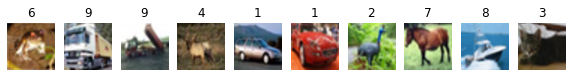

In [21]:
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].astype('uint8'), interpolation='spline16')
    plt.title('%d' % y_train[i])
    plt.axis('off')

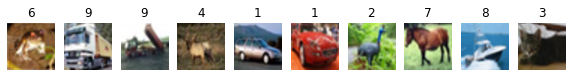

In [27]:
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].astype('uint8'), interpolation='spline16')
    plt.title('%d' % y_train[i])
    plt.axis('off')

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [38]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

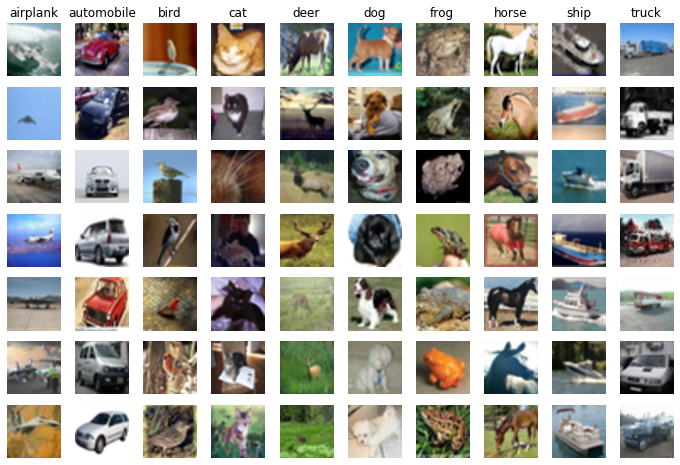

In [43]:
plt.figure(figsize=(12,8))
samples_per_class=7
num_classes=len(class_names)
for c,class_name in enumerate(class_names):
    idxes=np.flatnonzero(y_train==c)
#     print(idxes)
    samples_idxes = np.random.choice(idxes,samples_per_class,replace=False)
    for i,idx in enumerate(samples_idxes):
        plt_idx=i*num_classes+c+1
        plt.subplot(samples_per_class,num_classes,plt_idx)
        plt.imshow(X_train[idx].astype(np.uint8),interpolation='spline16')
        plt.axis('off')
        if i== 0:
            plt.title(class_names[c])